In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

In [2]:
data = pd.read_excel("fruit.xlsx")
print("Dataset Info:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None

Descriptive Statistics:
           diameter        weight           red         green          blue
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       9.975685    175.050792    153.847800     76.010600     11.363200
std        1.947844     29.212119     10.432954     11.708433      9.061275
min        2.960000     86.760000    115.000000     31.000000      2.000000
25%        8.460000    152.220000    147.000000     68.000000      2.000000
50%        9.9800

In [3]:
X = data[['diameter', 'weight', 'red', 'green', 'blue']].values
le = LabelEncoder()
y = le.fit_transform(data['name'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

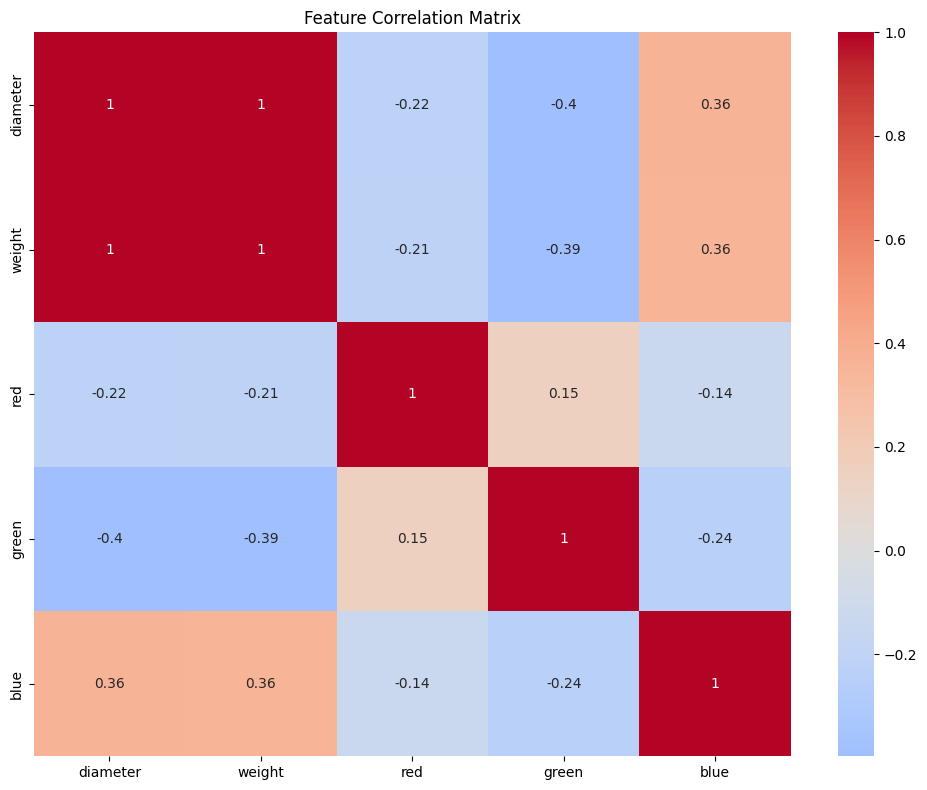

In [4]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['diameter', 'weight', 'red', 'green', 'blue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

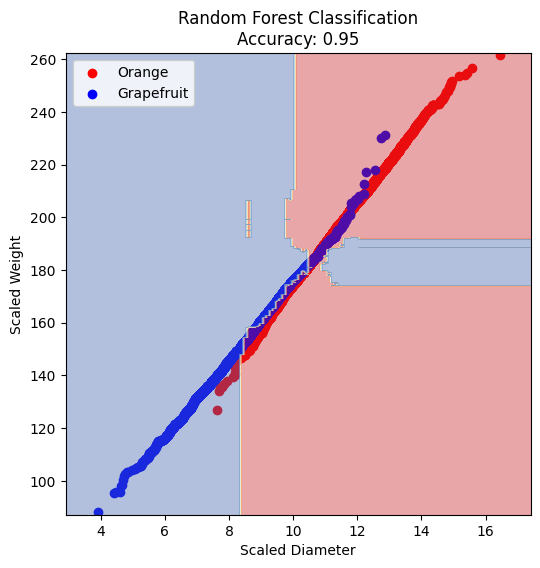

In [6]:
# Plot untuk Random Forest
plt.figure(figsize=(6, 6))

# Plot training points - menggunakan data training yang sudah discaling
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
            color='red', label='Orange')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
            color='blue', label='Grapefruit')

# Create mesh grid berdasarkan data training yang sudah discaling
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions for mesh points
mesh_predictions = rf.predict(np.c_[xx.ravel(), yy.ravel(),
                                    np.zeros_like(xx.ravel()),
                                    np.zeros_like(xx.ravel()),
                                    np.zeros_like(xx.ravel())])
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.4, cmap='RdYlBu')
plt.title(f'Random Forest Classification\nAccuracy: {rf_accuracy:.2f}')
plt.xlabel('Scaled Diameter')
plt.ylabel('Scaled Weight')
plt.legend()

plt.show()


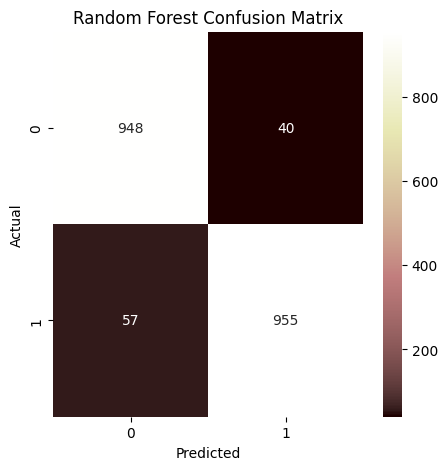

In [7]:
plt.figure(figsize=(5, 5))
cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
feature_names = ['diameter', 'weight', 'red', 'green', 'blue']

rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(rf_importance)


Random Forest Feature Importance:
    Feature  Importance
0  diameter    0.413035
1    weight    0.344809
3     green    0.119873
4      blue    0.079280
2       red    0.043002


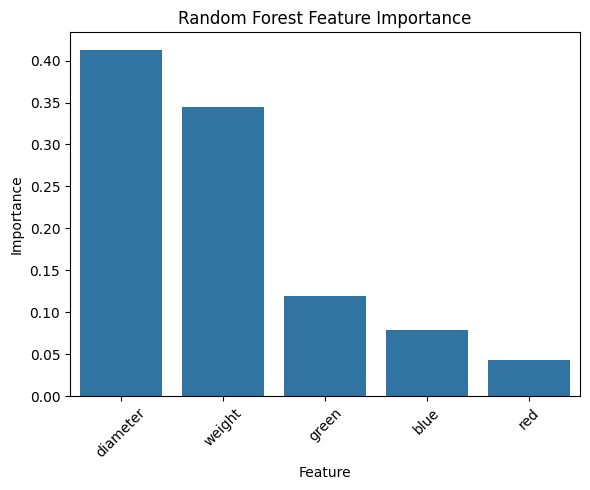

In [9]:
plt.figure(figsize=(6, 5))
sns.barplot(data=rf_importance, x='Feature', y='Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=['Orange', 'Grapefruit']))


Random Forest Classification Report:
              precision    recall  f1-score   support

      Orange       0.94      0.96      0.95       988
  Grapefruit       0.96      0.94      0.95      1012

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [11]:
pickle.dump(rf, open('rffruit.pkl', 'wb'))